In [18]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn
import sklearn.model_selection
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [19]:
# sklearn provides practice data sets for machine learning projects
from sklearn import datasets
boston = datasets.load_boston()

In [20]:
print(boston.get('DESCR'))

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [21]:
df_x = pd.DataFrame(boston.get('data'),columns=boston.get('feature_names'))
df_x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [22]:
df_y = pd.DataFrame(boston.get('target'))
df_y.head()

,0
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [23]:
df_y = np.array(df_y)

In [24]:
# split the data into training and test data sets
X_train, X_test, Y_train, Y_test = sklearn.cross_validation.train_test_split(
    df_x, df_y, test_size = 0.33, random_state = 5)

In [25]:
# create a model and plot to data to see how the model is performing
reg = linear_model.LinearRegression()
reg.fit(X_train,Y_train)
Y_predict = reg.predict(X_test)

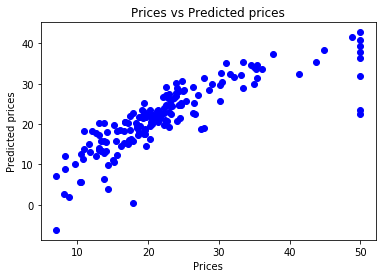

In [26]:
# plot the prices vs predicted prices
plt.scatter(Y_test, Y_predict, color='blue')
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

In [27]:
# measures the average difference betweenthe predicted value and the value in the training set.
# The higher the output, the less accurate the model is.
error = np.mean((Y_predict - Y_test)**2)
print('Mean Squared Error: ' + str(error))

Mean Squared Error: 28.541367275618295


In [28]:
error = mean_squared_error(Y_test, Y_predict)
print('Mean Squared Error: ' + str(error))

Mean Squared Error: 28.541367275618295


In [29]:
"""
Linear Regression Model via StatsModels
=========================================
My version of the Boston Housing data set
Average # of Rooms per Dwelling ("RM")
"""
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [30]:
target = pd.DataFrame(boston.target, columns=["MEDV"])
target.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [31]:
# The Ordinary Least Squares (OLS) model without a constant
X = df["RM"]
y = target["MEDV"]
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     4615.
Date:                Tue, 02 Oct 2018   Prob (F-statistic):          3.74e-256
Time:                        23:33:05   Log-Likelihood:                -1747.1
No. Observations:                 506   AIC:                             3496.
Df Residuals:                     505   BIC:                             3500.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RM             3.6534      0.054     67.930      0.000       3.548       3.759
==============================================================================
Omnibus:                       83.295   Durbin-Watson:                   0.493
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              152.507
Skew:                           0.955   Prob(JB):                     7.65e-34
Kurtosis:                       4.894   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
# The OLS model with a constant
X = df["RM"]
X.head()

0    6.575
1    6.421
2    7.185
3    6.998
4    7.147
Name: RM, dtype: float64

In [33]:
y = target["MEDV"]
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

In [34]:
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

In [35]:
# Print the model statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Tue, 02 Oct 2018   Prob (F-statistic):           2.49e-74
Time:                        23:33:09   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6706      2.650    -13.084      0.000     -39.877     -29.465
RM             9.1021      0.419     21.722      0.000       8.279       9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
# Linear Regression in Statsmodels with More Than One Variable
# RM and LSTAT (% lower status of the population)
X = df[["RM", "LSTAT"]]
y = target["MEDV"]
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     4637.
Date:                Tue, 02 Oct 2018   Prob (F-statistic):               0.00
Time:                        23:33:14   Log-Likelihood:                -1582.9
No. Observations:                 506   AIC:                             3170.
Df Residuals:                     504   BIC:                             3178.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RM             4.9069      0.070     69.906      0.000       4.769       5.045
LSTAT         -0.6557      0.031    -21.458      0.000      -0.716      -0.596
==============================================================================
Omnibus:                      145.153   Durbin-Watson:                   0.834
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              442.157
Skew:                           1.351   Prob(JB):                     9.70e-97
Kurtosis:                       6.698   Cond. No.                         4.72
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
"""
Linear Regression via SKlearn
===============================
My version of the Boston Housing data set
Average # of Rooms per Dwelling ("RM")
"""
boston = datasets.load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [40]:
target = pd.DataFrame(boston.target, columns=["MEDV"])
target.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [56]:
X = df
y = target["MEDV"]

In [57]:
lm = linear_model.LinearRegression()
model = lm.fit(X,y)

In [58]:
predictions = lm.predict(X)
print(predictions[0:5])

[30.00821269 25.0298606  30.5702317  28.60814055 27.94288232]


In [59]:
lm.score(X,y)

0.7406077428649428

In [60]:
lm.coef_

array([-1.07170557e-01,  4.63952195e-02,  2.08602395e-02,  2.68856140e+00,
       -1.77957587e+01,  3.80475246e+00,  7.51061703e-04, -1.47575880e+00,
        3.05655038e-01, -1.23293463e-02, -9.53463555e-01,  9.39251272e-03,
       -5.25466633e-01])

In [61]:
lm.intercept_

36.4911032803614